In [14]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

warnings.filterwarnings(action='ignore')

if get_ipython():
    print("jupyter envirionment")
    PROJECT_DIR = os.path.abspath(os.path.join(os.path.dirname('__file__'), '..'))
    from tqdm import tqdm_notebook as tqdm  # 이거 안해주면 한 줄씩 출력됨 ;;
else:
    print("command shell envirionment")
    PROJECT_DIR = os.path.abspath(os.path.join(os.path.dirname(__file__), '..'))
    from tqdm import tqdm

# sys.pathdp PROJECT_DIR 추가
sys.path.insert(0, PROJECT_DIR)

jupyter envirionment


# EDA

In [24]:
import time
from urllib.request import urlopen #python 내장 라이브러리
import urllib
import bs4 
import pandas as pd
import numpy as np
from datetime import datetime
from urllib.error import HTTPError
import http.client
import torch
import pymysql
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")
import sqlalchemy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import konlpy
import re




today = str(datetime.today().strftime("%Y%m%d"))
df = pd.read_csv('/home/lab01/News_'+today+'.csv',dtype= {'press_id': 'object', 'section_id': 'object'})
df_s = pd.read_csv('/home/lab01/News_s'+today+'.csv',dtype= {'press_id': 'object', 'section_id': 'object'})


0. 데이터 구성 <br>
데이터는 headline, writer, url, content, created_date, press_id, section_id로 구성되어있습니다.

In [25]:
df.head()

,id,headline,writer,url,content,created_date,press_id,section_id
0,0,"“도발적 언행”…외교부, 중국대사 초치",박은경 기자,https://n.news.naver.com/article/032/000322896...,"“한·중 우호에 역행” 강한 유감외교부는 9일 싱하이밍 주한 중국대사를 초치하고, ...",2023-06-09 21:28:03,032,100
1,1,여당 “중국대사 내정간섭”…야당 “정부 혼자 중국과 싸우나”,정대연 기자,https://n.news.naver.com/article/032/000322896...,정부·여당 ‘베팅’ 발언 강경 대응…김기현은 싱 대사 만찬 보이콧이재명 대표는 “경...,2023-06-09 21:28:01,032,100
2,2,태영호 빈자리에 호남·40대 김가람,이두리 기자,https://n.news.naver.com/article/032/000322896...,최고위원 보선 70% 득표 당선김가람 국민의힘 최고위원(왼쪽)이 9일 국회에서 열린...,2023-06-09 21:27:04,032,100
3,3,민주당 혁신위원장 ‘인물난’…유인태·원혜영 등 물망,김윤나영 기자,https://n.news.naver.com/article/032/000322896...,후보 추천…대다수 내부 인사“무게감 있는 외부 인사 안 보여”이재명 더불어민주당 대...,2023-06-09 21:27:02,032,100
4,4,전현희 비위 혐의 ‘처분 요구’ 않으면서 ‘확인 내용’은 적시한 감사원,조문희 기자,https://n.news.naver.com/article/032/000322896...,전 위원장 “표적감사” 반발국민권익위원회를 직무감찰한 감사원이 9일 전현희 권익위원...,2023-06-09 21:21:16,032,100


1. Media 분포 <br>
총 10개의 Media로 부터 데이터가 구성되어있습니다. 

In [26]:
df['press_id'] = df['press_id'].map({'032':'경향신문',
                                    '005':'국민일보',
                                    '020':'동아일보',
                                    '021':'문화일보',
                                    '081':'서울신문',
                                    '022':'세계일보',
                                    '023':'조선일보',
                                    '025':'중앙일보',
                                    '028':'한겨례',
                                    '469':'한국일보'})

In [27]:
pd.DataFrame(df['press_id'].value_counts())

,press_id
문화일보,98
중앙일보,92
국민일보,92
세계일보,86
한국일보,80
서울신문,77
경향신문,69
동아일보,66
한겨례,63
조선일보,59


원문(Article Original) <br>
Sentence Tokenzing 과정을 통하여 문장단위로 분리 후 분석

In [5]:
# import nltk
# nltk.download('punkt')

In [6]:
# from nltk.tokenize import sent_tokenize
# para = df['content'][1]
# sent_tokenize(para)
# #잘안됨...

In [19]:
len(df['content'][1].split('.'))

23

In [20]:
len(df['content'])

782

In [9]:
pd.DataFrame(original_sent_counts).value_counts()

NameError: name 'original_sent_counts' is not defined

<AxesSubplot:>

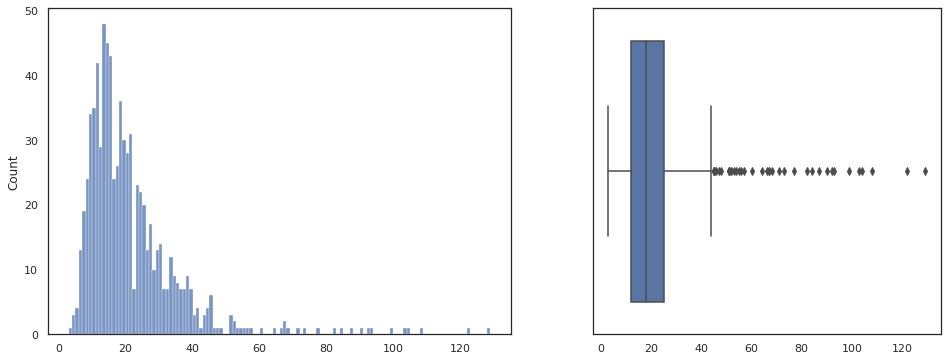

In [28]:
# sentence_원문
original_sent_counts = []
for i in range(len(df['content'])):
    original_sent_counts.append(len(df['content'][i].split('.')))
    
fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(original_sent_counts, binwidth=1, ax=axs[0])
sns.boxplot(original_sent_counts, ax=axs[1])


<AxesSubplot:>

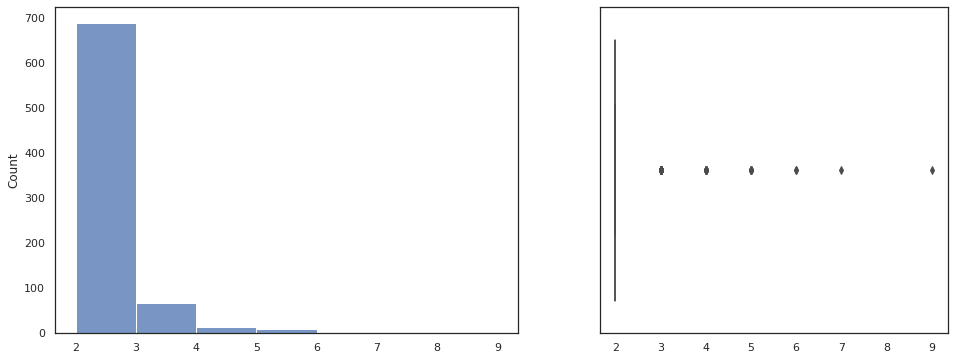

In [38]:
# sentence_요약문
summary_sent_counts = []

for i in range(len(df_s['content'])):
    summary_sent_counts.append(len(df_s['content'][i].split('.')))
    
fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(summary_sent_counts, binwidth=1, ax=axs[0])
sns.boxplot(summary_sent_counts, ax=axs[1])

In [29]:
pd.DataFrame(original_sent_counts).describe()

,0
count,782.000000
mean,21.191816
std,14.944337
min,3.000000
25%,12.000000
50%,18.000000
75%,25.000000
max,129.000000


In [40]:
pd.DataFrame(summary_sent_counts).describe()

,0
count,782.000000
mean,2.179028
std,0.599761
min,2.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,9.000000


<AxesSubplot:>

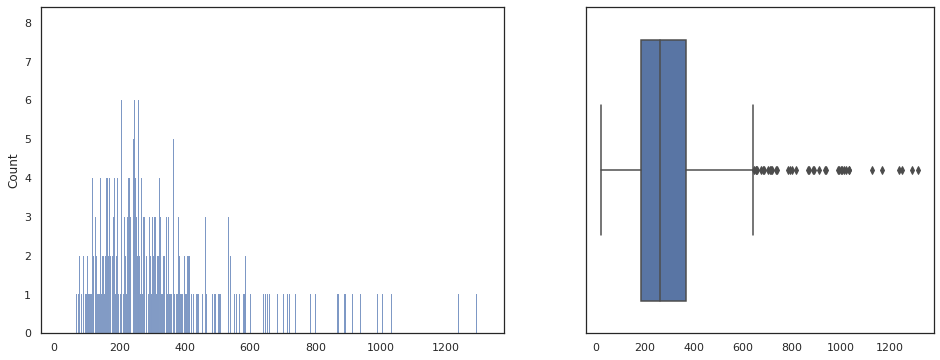

In [48]:
# word 수

original_word_counts = []
for i in range(len(df['content'])):
    original_word_counts.append(len(df['content'][i].split(' ')))
    
fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(original_word_counts, binwidth=1, ax=axs[0])
sns.boxplot(original_word_counts, ax=axs[1])


<AxesSubplot:>

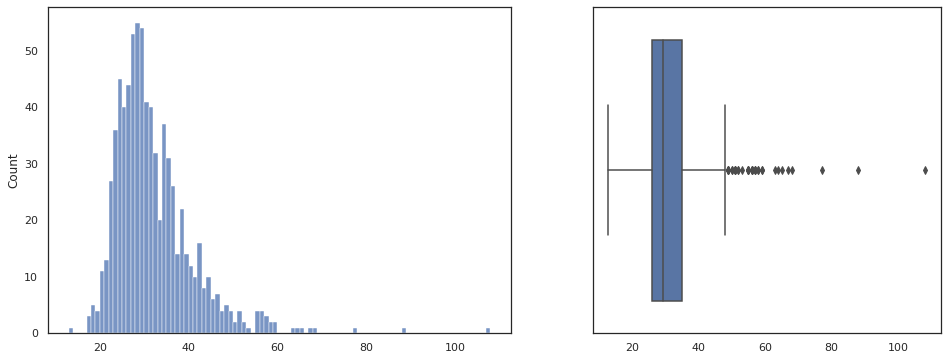

In [45]:
# word 수_요약문


summary_word_counts = []
for i in range(len(df_s['content'])):
    summary_word_counts.append(len(df_s['content'][i].split(' ')))
    
fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(summary_word_counts, binwidth=1, ax=axs[0])
sns.boxplot(summary_word_counts, ax=axs[1])


In [49]:
pd.DataFrame(original_word_counts).describe()

,0
count,782.000000
mean,305.814578
std,186.348352
min,24.000000
25%,185.000000
50%,263.000000
75%,368.750000
max,1314.000000


In [50]:
pd.DataFrame(summary_word_counts).describe()

,0
count,782.000000
mean,31.599744
std,9.026049
min,13.000000
25%,26.000000
50%,29.500000
75%,35.000000
max,108.000000


본문의 길이는 평균 22문장 및 308개 정도의 단어로 구성되어 있습니다.
이는 기존 summary task에서 많이 쓰이는 CNN(평균 34문장, 760단어)이나 DailyMail(평균 29문장, 653단어) 같은 데이터와 비교했을 때 상당히 길이가 적은 편에 속한다고 할 수 있습니다.



생성요약 정답, 추출요약정답
https://dacon.io/competitions/open/235671/codeshare/2006

# N-Gram

In [6]:
df_o = pd.read_csv('/home/lab01/News_'+today+'.csv',dtype= {'press_id': 'object', 'section_id': 'object'})
df_s = pd.read_csv('/home/lab01/News_s'+today+'.csv',dtype= {'press_id': 'object', 'section_id': 'object'})

df_o = df_o['content'] 
df_s = df_s['content'] 

In [10]:
df_o[0]

'더불어민주당 혁신기구 책임자로 임명된 이래경 사단법인 다른백년 이사장이 지난 2월16일 사회관계망서비스에 올린 글. 이 이사장 페이스북 캡처이상민 더불어민주당 의원이 당 혁신위원장으로 선임된 지 9시간 만에 낙마한 이래경 사단법인 다른백년 명예이사장 사태와 관련해 7일 “이재명 대표 스스로 퇴진하는 것이 저는 맞다고 본다”고 말했다.이 의원은 이날 KBS 라디오 ‘최경영의 최강시사’에서 “아무리 혁신위를 구성한다고 할지라도 이번에 드러났듯이 (이 대표가) 자기 쪽에 기운 사람을 하지 않겠냐. 그건 본능에 가까운 것”이라며 이같이 말했다.이 의원은 “민주당의 위기를 극복할 어떤 혁신위를 구성하는 데 초장부터 완전히 어긋났다고 하는데 이런 일이 국무총리나 장관한테 일어났다고 하면 우리 당이 어떻겠나?  ‘인사 참사 났다’고 그런다. 윤석열 정부에서 일어났다면 ‘대통령이 책임지라고 하고 당장 물러나라’고 하지 않겠냐”며 “이런 잣대를 우리한테 돌려서 보면 우리도 (민주당도) 일반 민심의, 국민의 눈높이에서 한심하다는 평가를 받을 것”이라고 말했다.이 의원은 이래경 이사장이 혁신기구 수장으로 선임된 과정을 두고도 “논의 과정은 완전히 깜깜이”라며 각을 세웠다. 그는 “언론 보도에서도 최고위원들조차 발표 전날 저녁 식사 자리에서 이 대표한테 전해 들었다는 이야기이고, 본인(이 이사장)도 그 전날 통보받았다고 한다”며 “얼마나 폐쇄적이고 아주 몇몇 사람들 중심으로만, 160석 구성을 가진 제1당의 의사결정이 엉망진창이다.”라고 했다.이 의원은 이 대표와 관련해 “돈 봉투 사건이나 최측근 김남국 의원 코인 건에서도 매우 부적절한 대응을 한 한계가 있다”며 “이를 제거하려면 이 대표 스스로가 퇴진하는 것이 맞다고 보는 것”이라고 말했다.'

In [72]:
len(df_s[0])

128

## 요약문장 글자 수 길이 분포를 인덱스화하여 빈도수 체크

In [204]:
import collections

extractives = []
for l in df_o:
    extractives.append(len(l))
    
collections.Counter(extractives)

Counter({865: 1,
         1189: 1,
         531: 1,
         870: 3,
         1998: 1,
         1757: 2,
         2593: 1,
         1106: 2,
         738: 2,
         2467: 1,
         2180: 1,
         1025: 1,
         1995: 1,
         1231: 2,
         1060: 1,
         1244: 1,
         1345: 1,
         860: 4,
         1094: 1,
         1194: 1,
         715: 1,
         747: 2,
         743: 1,
         1034: 1,
         496: 1,
         957: 3,
         907: 2,
         1122: 2,
         1347: 1,
         785: 1,
         914: 2,
         1445: 1,
         2326: 1,
         832: 1,
         919: 1,
         984: 1,
         368: 1,
         959: 3,
         490: 1,
         662: 1,
         1129: 1,
         668: 2,
         825: 1,
         1013: 1,
         1845: 2,
         877: 1,
         1504: 1,
         2169: 1,
         896: 1,
         1783: 1,
         1969: 1,
         2582: 1,
         1342: 2,
         1669: 1,
         1907: 1,
         1619: 1,
         2259: 1

In [205]:
pd.DataFrame(extractives).describe()

,0
count,787.000000
mean,1314.105464
std,726.840755
min,37.000000
25%,849.000000
50%,1176.000000
75%,1580.500000
max,6275.000000


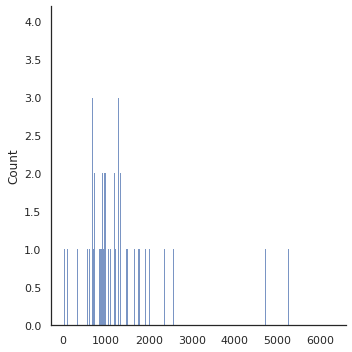

In [206]:
sns.displot(extractives, binwidth=1)

word 분포

<AxesSubplot:>

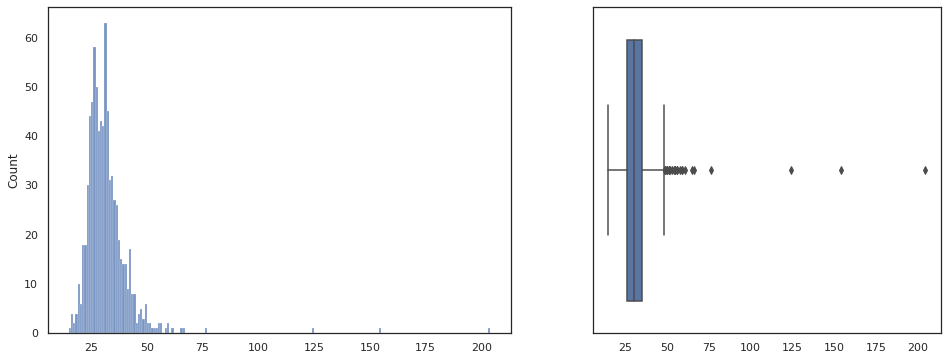

In [13]:
# word 수


extractive_word_counts= []
for i in range(len(df_s)):
    extractive_word_counts.append(len(df_s[i].split(' ')))
    

fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(extractive_word_counts, binwidth=1, ax=axs[0])
sns.boxplot(extractive_word_counts, ax=axs[1])


# 생성요약

In [20]:
from konlpy.tag import Mecab

tokenizer = Mecab()

In [91]:
def n_grams(tokens, n):
    l = len(tokens)
    return [tuple(tokens[i: i+n]) for i in range(l) if i + n <= l]

In [50]:
# print(n_grams(['건너뛰기'], 2))
# print(n_grams(['건너뛰기', 'ad', 'sdf'], 2))

Novel N-gram 구해보기

In [104]:
origin_text = df_o
summary_text = df_s

In [179]:
len(set(n_grams(source_tokens, 2)))

160722

In [198]:
from konlpy.tag import Mecab

def cal_novel(source, summary, n=2, use_tokenizer= True):
        tokenizer = Mecab()
        
        source_tokens= [tokenizer.morphs(text) for text in source]
        flattened_list = [item for sublist in source_tokens for item in sublist] #1차원리스트로 만들기
        source_tokens = flattened_list
        
        summary_tokens = [tokenizer.morphs(text) for text in summary]
        flattened_list = [item for sublist in source_tokens for item in sublist] #1차원리스트로 만들기
        summary_tokens = flattened_list

        source_grams = set(n_grams(source_tokens, n))
        summary_grams = set(n_grams(summary_tokens, n))

        joint = summary_grams.intersection(source_grams) #교집합
        novel = summary_grams - joint #요약부분중 겹치치 않는 부분

        
        return len(novel), len(summary_grams)
        
def cal_novel_repeat(source_lines, summary_lines, n=2, use_tokenizer=True):
    assert len(source_lines) == len(summary_lines)
    
    lines = zip(source_lines, summary_lines)
    
    novel_n_grams_prop_list = []  #새로운 단어 비중
    total_novel_grams_num = 0   #새로운 단어개수
    total_summary_grams_num = 0  #요약단어개수
    for source, summary in lines:
        novel_grams_num, summary_grams_num = cal_novel(source, summary, n, use_tokenizer)
        novel_n_grams_prop_list.append(novel_grams_num / (summary_grams_num + 1e-6))
        total_novel_grams_num += novel_grams_num
        total_summary_grams_num += summary_grams_num
    return novel_n_grams_prop_list, total_novel_grams_num, total_summary_grams_num


In [199]:
cal_novel(origin_text, summary_text,1)

(551, 1813)

0
189116
0.0


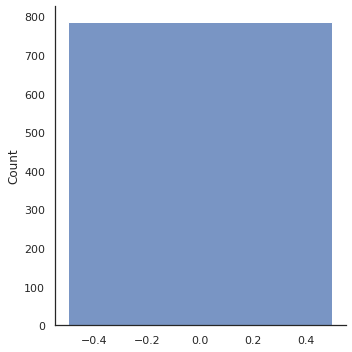

In [200]:
# 1-gram
novel_n_grams_prop_list, total_novel_grams_num, total_summary_grams_num = cal_novel_repeat(origin_text, summary_text,1)
print(total_novel_grams_num)
print(total_summary_grams_num)
print(total_novel_grams_num / total_summary_grams_num)
sns.displot(novel_n_grams_prop_list)

0
535908
0.0


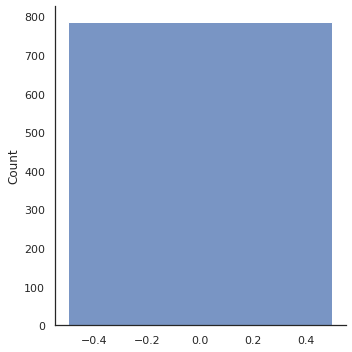

In [201]:
# 2-gram
novel_n_grams_prop_list, total_novel_grams_num, total_summary_grams_num = cal_novel_repeat(origin_text, summary_text, n=2)
print(total_novel_grams_num)
print(total_summary_grams_num)
print(total_novel_grams_num / total_summary_grams_num)
sns.displot(novel_n_grams_prop_list)

# 참고

In [ ]:
# def cal_novel(source, summary, n=2, use_tokenizer=False):
#     if use_tokenizer == True:
#         pass
# #         tokenizer = Mecab()
# #         source_tokens = tokenizer.morphs(source)
# #         summary_tokens = tokenizer.morphs(summary)
#     else:
#         source_tokens  = source.split()
#         summary_tokens = summary.split()
        
#     source_grams = set(n_grams(source_tokens, n))
#     summary_grams = set(n_grams(summary_tokens, n))

#     joint = summary_grams.intersection(source_grams) #교집합
#     novel = summary_grams - joint #겹치치 않는 부분

#     return len(novel), len(summary_grams)

        
# def cal_novel_repeat(source_lines, summary_lines, n=2, use_tokenizer=False):
#     assert len(source_lines) == len(summary_lines)
    
#     lines = zip(source_lines, summary_lines)
    
#     novel_n_grams_prop_list = []
#     total_novel_grams_num = 0
#     total_summary_grams_num = 0
#     for source, summary in lines:
#         novel_grams_num, summary_grams_num = cal_novel(source, summary, n, use_tokenizer)
#         novel_n_grams_prop_list.append(novel_grams_num / (summary_grams_num + 1e-6))
#         total_novel_grams_num += novel_grams_num
#         total_summary_grams_num += summary_grams_num
#     return novel_n_grams_prop_list, total_novel_grams_num, total_summary_grams_num